# **Market Analysis: Identifying Profitable Customers & Bestselling Products**

## **Goals**
1. **Identify who our most profitable customers are**  
   - Are they married or unmarried?  
   - Working or retired?  
   - Premium or budget buyers?  

2. **Find the top 3 bestselling products based on profitability.**

## **Steps to Follow**
✔ **Analyze Customer Data** – Check customer profiles and spending habits.  
✔ **Find Most Profitable Customers** – Look at who buys frequently and spends the most.  
✔ **Identify Bestselling Products** – Rank products based on profit, not just sales volume.  
✔ **Understand Why Customers Stay Loyal** – Find common characteristics among top customers (e.g., they might prefer premium products, need fast delivery, or buy frequently).  

## **Expected Insights**
🔹 **Top 3 Most Profitable Products** – The ones making the highest profit.  
🔹 **Loyal Customer Profile** – A breakdown of their key traits (age, job, budget, preferences).  
🔹 **Hypothesis (Why They Stay Loyal?)**  
   - Example: If most loyal customers are **working professionals**, they might prefer **quick delivery and high-quality products**.  


In [258]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#### Performing EDA

In [259]:
data = pd.read_csv('purchase_behaviour.csv')

In [260]:
data1 =pd.read_csv('transaction_data.csv')

In [261]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [262]:
data1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [263]:
data.shape

(72637, 3)

In [264]:
data1.shape

(264836, 8)

In [265]:
data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [266]:
data1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

#### Both data and data1 contain no null values, allowing us to proceed directly

In [267]:
data.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [268]:
data1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [269]:
merged_df = pd.merge(data1, data, on='LYLTY_CARD_NBR', how='left')

#### Merging or combining two files using a left join 

##### The datasets are merged using a left join to retain all transaction records from data1 and supplement them with corresponding customer profile information from data, ensuring no transaction data is lost even when customer details are missing

In [270]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [271]:
merged_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [272]:

merged_df.duplicated().sum()


1

In [273]:
merged_df= merged_df.drop_duplicates()

##### The command merged_df.duplicated().sum() shows that there is 1 duplicate row in the merged dataset. I have removed this duplicate to ensure the data is clean and accurate.

In [274]:
merged_df.duplicated().sum()

0

In [275]:
merged_df[merged_df['LYLTY_CARD_NBR'].isnull()]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER


##### The value_counts() for the PREMIUM_CUSTOMER column shows the distribution of customer types

In [276]:
merged_df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69690
Name: count, dtype: int64

##### This indicates that Mainstream customers make up the largest group, followed by Budget and Premium customers.

##### The value_counts() for the LIFESTAGE column shows the distribution of customer life stages:

In [277]:
merged_df['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54478
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64

##### This shows that the majority of customers fall under the OLDER and FAMILY life stages

In [278]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [279]:
numerical_cols = merged_df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES'],
      dtype='object')


##### Detecting outliers helps in identifying data points that significantly differ from the rest of the dataset.which helps to improve the Accurarcy

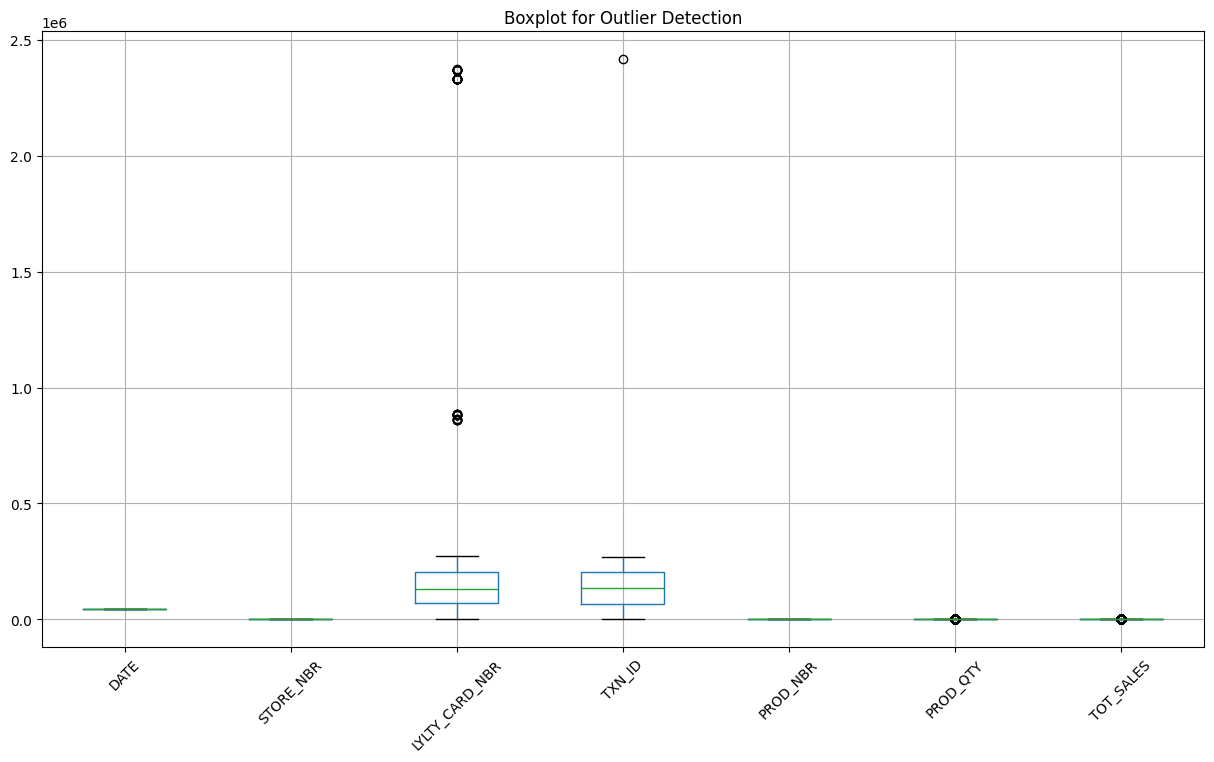

In [280]:
plt.figure(figsize=(15, 8))
merged_df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [281]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outlier_counts = {col: len(detect_outliers_iqr(merged_df, col)) for col in numerical_cols}
print(outlier_counts)


{'DATE': 0, 'STORE_NBR': 0, 'LYLTY_CARD_NBR': 44, 'TXN_ID': 1, 'PROD_NBR': 0, 'PROD_QTY': 28797, 'TOT_SALES': 578}


In [282]:
merged_df.shape

(264835, 10)

In [283]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for col in numerical_cols:
    merged_df = remove_outliers_iqr(merged_df, col)


print(f"Dataset after outlier removal: {merged_df.shape}")


Dataset after outlier removal: (236003, 10)


##### Top 3 Products by Total Sales with visualization

In [284]:
product_profit = merged_df.groupby('PROD_NAME').agg({'TOT_SALES': 'sum'}).reset_index()
product_profit_sorted = product_profit.sort_values(by='TOT_SALES', ascending=False)
top_3_products = product_profit_sorted.head(3)

Text(0.5, 1.0, 'Top 3 Products by Total Sales')

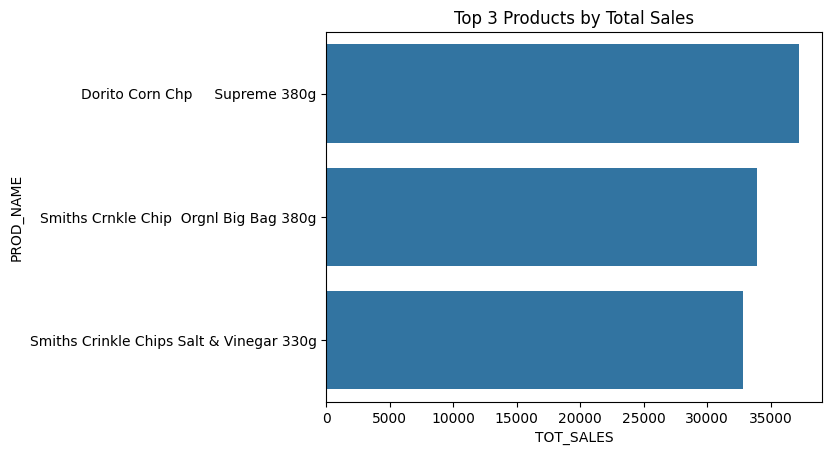

In [285]:
import seaborn as sns
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_products)
plt.title('Top 3 Products by Total Sales')

In [297]:

customer_spending = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()


top_customers = customer_spending.sort_values(by='TOT_SALES', ascending=False)

top_customers.head(10)


# Select top 10 customers
top_10_customers = top_customers.head(10)

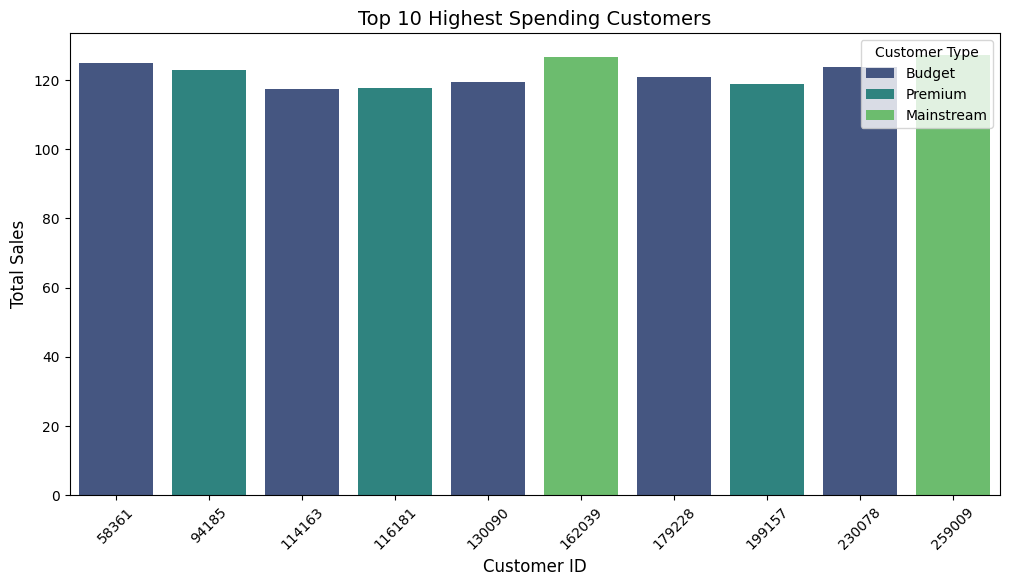

In [298]:



plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_customers,
    x="LYLTY_CARD_NBR",
    y="TOT_SALES",
    hue="PREMIUM_CUSTOMER",  
    palette="viridis"
)

plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Top 10 Highest Spending Customers", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Customer Type")


plt.show()



##### Define marital and employment status based on LIFESTAGE

In [299]:
def categorize_status(lifestage):
    if lifestage in ['YOUNG FAMILIES', 'OLDER FAMILIES', 'OLDER SINGLES/COUPLES']:
        marital_status = "Married"
    else:
        marital_status = "Unmarried"

    if lifestage in ['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'MIDAGE SINGLES/COUPLES']:
        employment_status = "Working"
    else:
        employment_status = "Retired"
    
    return pd.Series([marital_status, employment_status])

merged_df[['MARITAL_STATUS', 'EMPLOYMENT_STATUS']] = merged_df['LIFESTAGE'].apply(categorize_status)

customer_profitability = merged_df.groupby(['MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

customer_profitability = customer_profitability.sort_values(by='TOT_SALES', ascending=False)

print(customer_profitability)


   MARITAL_STATUS EMPLOYMENT_STATUS PREMIUM_CUSTOMER  TOT_SALES
0         Married           Retired           Budget   289630.5
10      Unmarried           Working       Mainstream   229013.5
1         Married           Retired       Mainstream   224298.7
2         Married           Retired          Premium   201428.7
7       Unmarried           Retired       Mainstream   160510.3
3         Married           Working           Budget   132724.6
6       Unmarried           Retired           Budget   125472.3
8       Unmarried           Retired          Premium   101793.4
11      Unmarried           Working          Premium    91336.8
4         Married           Working       Mainstream    88115.5
9       Unmarried           Working           Budget    87292.2
5         Married           Working          Premium    79853.1


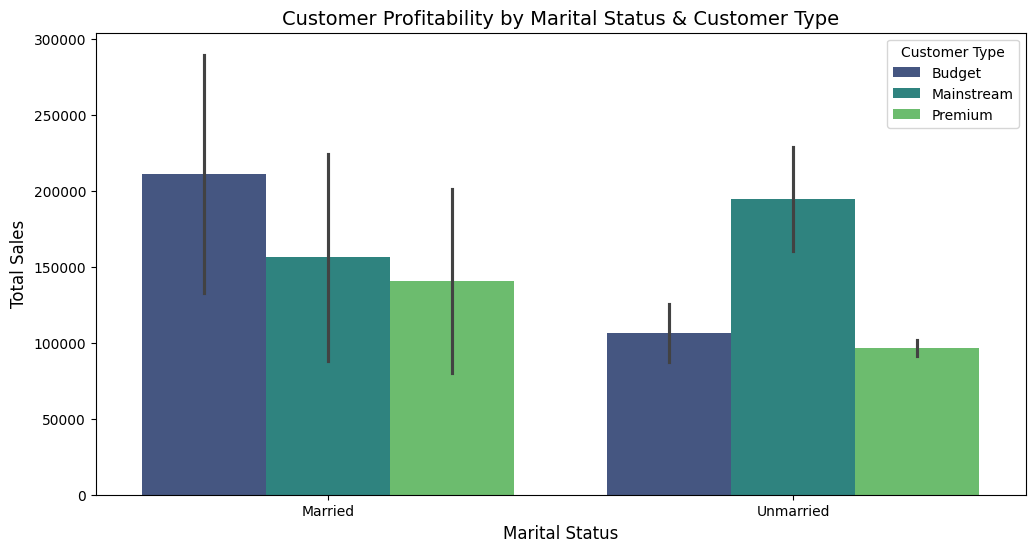

In [288]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=customer_profitability,
    x="MARITAL_STATUS",
    y="TOT_SALES",
    hue="PREMIUM_CUSTOMER",
    palette="viridis"
)

# Labels and title
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Customer Profitability by Marital Status & Customer Type", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Customer Type")

# Show plot
plt.show()


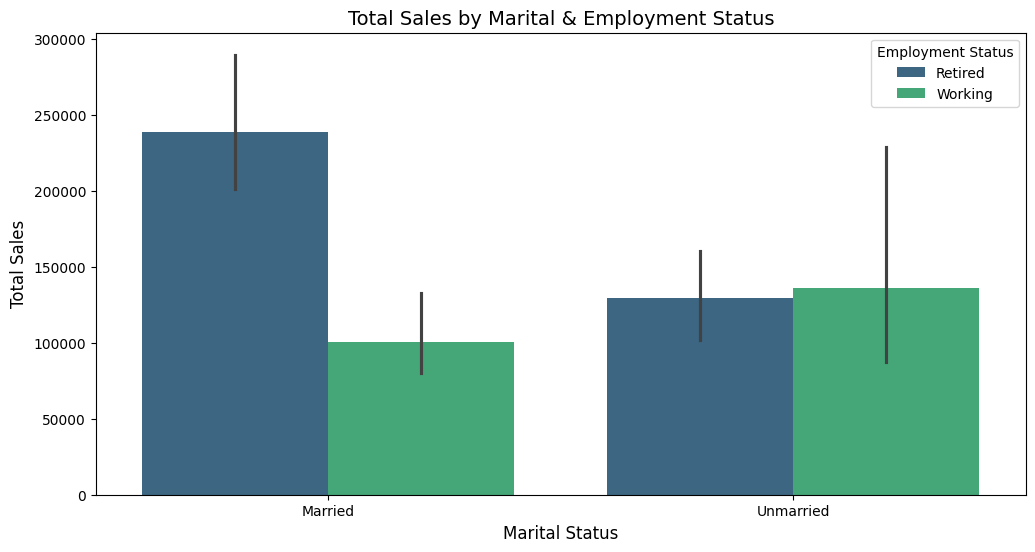

In [300]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=customer_profitability,
    x="MARITAL_STATUS",
    y="TOT_SALES",
    hue="EMPLOYMENT_STATUS",
    palette="viridis"
)

plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Marital & Employment Status", fontsize=14)
plt.legend(title="Employment Status")

plt.show()


##### This is the summary of customer spending by life stage and customer type, showing the total number of transactions, total spending, and average spending per transaction, sorted by total spending.

In [305]:
import pandas as pd

customer_summary = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['count', 'sum', 'mean']).reset_index()

customer_summary.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'Total_Transactions', 'Total_Spending', 'Avg_Spending_per_Transaction']

customer_summary = customer_summary.sort_values(by='Total_Spending', ascending=False)

print(customer_summary)


                 LIFESTAGE PREMIUM_CUSTOMER  Total_Transactions  \
6           OLDER FAMILIES           Budget               21508   
13                RETIREES       Mainstream               18779   
19   YOUNG SINGLES/COUPLES       Mainstream               17572   
15          YOUNG FAMILIES           Budget               17656   
9    OLDER SINGLES/COUPLES           Budget               16568   
10   OLDER SINGLES/COUPLES       Mainstream               16428   
11   OLDER SINGLES/COUPLES          Premium               15968   
12                RETIREES           Budget               13364   
7           OLDER FAMILIES       Mainstream               13258   
14                RETIREES          Premium               11605   
16          YOUNG FAMILIES       Mainstream               11879   
1   MIDAGE SINGLES/COUPLES       Mainstream               10660   
17          YOUNG FAMILIES          Premium               10643   
8           OLDER FAMILIES          Premium               1036

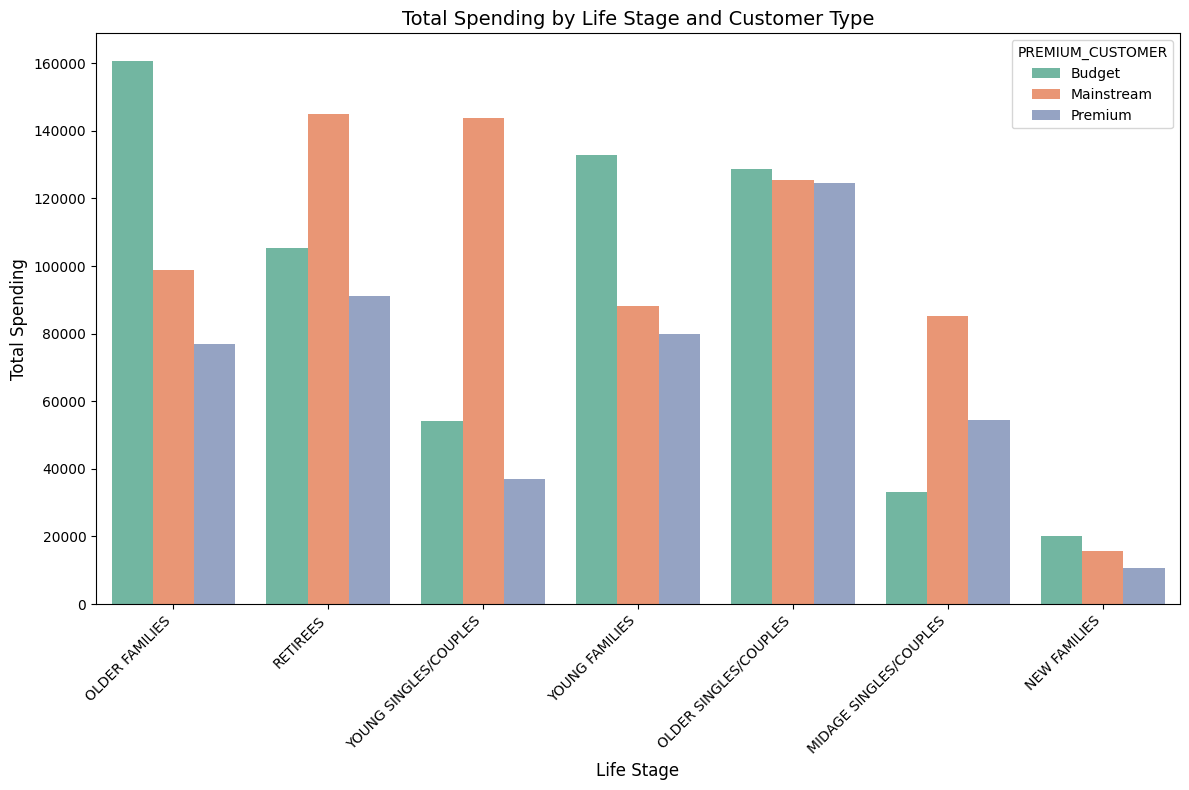

In [307]:
plt.figure(figsize=(12, 8))

sns.barplot(data=customer_summary, x='LIFESTAGE', y='Total_Spending', hue='PREMIUM_CUSTOMER', palette='Set2')

plt.xlabel('Life Stage', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.title('Total Spending by Life Stage and Customer Type', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [308]:
loyal_customers = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count().reset_index()

loyal_customers.columns = ['Customer_ID', 'Lifestage', 'Premium_Customer', 'Total_Purchases']

loyal_customers = loyal_customers.sort_values(by='Total_Purchases', ascending=False)

print(loyal_customers.head(10))


       Customer_ID              Lifestage Premium_Customer  Total_Purchases
36909       162039         OLDER FAMILIES       Mainstream               18
27551       116181         YOUNG FAMILIES          Premium               17
39575       172032  YOUNG SINGLES/COUPLES       Mainstream               17
2964         13138         YOUNG FAMILIES       Mainstream               17
22474        94185         YOUNG FAMILIES          Premium               16
25712       109036  OLDER SINGLES/COUPLES          Premium               16
52886       230078         OLDER FAMILIES           Budget               16
24579       104117         OLDER FAMILIES           Budget               16
48702       213140  OLDER SINGLES/COUPLES          Premium               16
41400       179228         YOUNG FAMILIES           Budget               16


C:\Users\NITHYA\AppData\Local\Temp\ipykernel_43452\2160288604.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


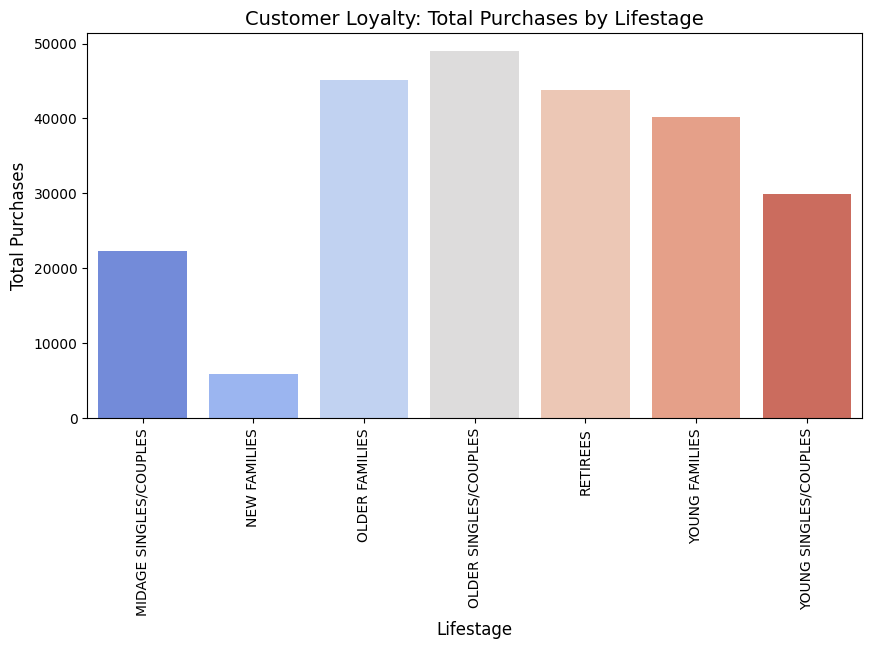

In [ ]:

loyalty_by_lifestage = loyal_customers.groupby(['Lifestage'])['Total_Purchases'].sum().reset_index()


plt.figure(figsize=(10, 5))
sns.barplot(
    data=loyalty_by_lifestage,
    x="Lifestage",
    y="Total_Purchases",
    palette="coolwarm"
)

plt.xlabel("Lifestage", fontsize=12)
plt.ylabel("Total Purchases", fontsize=12)
plt.title("Customer Loyalty: Total Purchases by Lifestage", fontsize=14)
plt.xticks(rotation=90)


plt.show()


In [314]:
loyal_customers = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count().reset_index()

loyal_customers.columns = ['Customer_ID', 'Lifestage', 'Premium_Customer', 'Total_Purchases']

loyal_customers = loyal_customers.sort_values(by='Total_Purchases', ascending=False)

print(loyal_customers.head(10))

avg_purchases_by_type = loyal_customers.groupby('Premium_Customer')['Total_Purchases'].mean().reset_index()

avg_purchases_by_lifestage = loyal_customers.groupby('Lifestage')['Total_Purchases'].mean().reset_index()

print("Average Purchases by Premium Customer Type:")
print(avg_purchases_by_type)

print("\nAverage Purchases by Life Stage:")
print(avg_purchases_by_lifestage)


       Customer_ID              Lifestage Premium_Customer  Total_Purchases
36909       162039         OLDER FAMILIES       Mainstream               18
27551       116181         YOUNG FAMILIES          Premium               17
39575       172032  YOUNG SINGLES/COUPLES       Mainstream               17
2964         13138         YOUNG FAMILIES       Mainstream               17
22474        94185         YOUNG FAMILIES          Premium               16
25712       109036  OLDER SINGLES/COUPLES          Premium               16
52886       230078         OLDER FAMILIES           Budget               16
24579       104117         OLDER FAMILIES           Budget               16
48702       213140  OLDER SINGLES/COUPLES          Premium               16
41400       179228         YOUNG FAMILIES           Budget               16
Average Purchases by Premium Customer Type:
  Premium_Customer  Total_Purchases
0           Budget         3.947987
1       Mainstream         3.569458
2          P

C:\Users\NITHYA\AppData\Local\Temp\ipykernel_43452\3321564631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Premium_Customer', y='Total_Purchases', data=avg_purchases_by_type, palette='Set2')


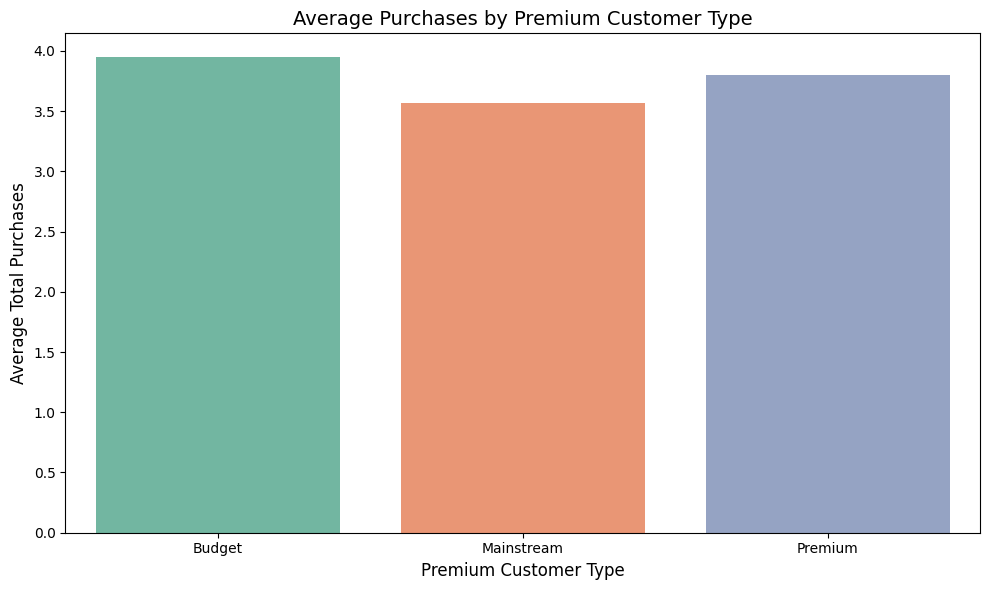

C:\Users\NITHYA\AppData\Local\Temp\ipykernel_43452\3321564631.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lifestage', y='Total_Purchases', data=avg_purchases_by_lifestage, palette='Set1')


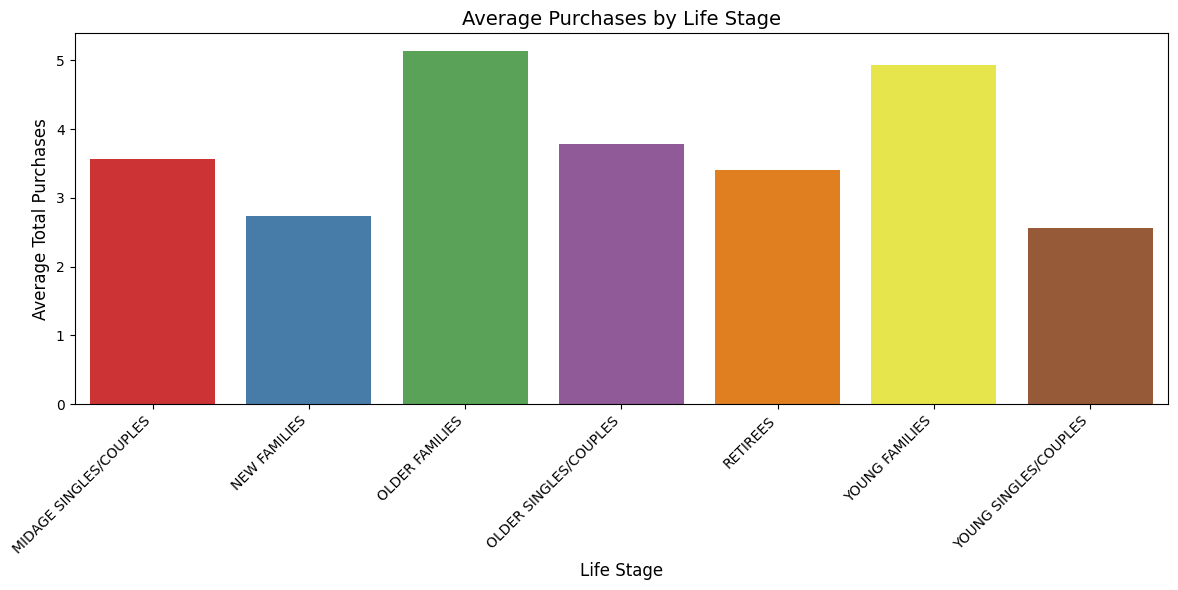

In [315]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Premium_Customer', y='Total_Purchases', data=avg_purchases_by_type, palette='Set2')
plt.xlabel('Premium Customer Type', fontsize=12)
plt.ylabel('Average Total Purchases', fontsize=12)
plt.title('Average Purchases by Premium Customer Type', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Lifestage', y='Total_Purchases', data=avg_purchases_by_lifestage, palette='Set1')
plt.xlabel('Life Stage', fontsize=12)
plt.ylabel('Average Total Purchases', fontsize=12)
plt.title('Average Purchases by Life Stage', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
